# **Baseline - Support Vector Machine (SVM)**

The following code utilizes handcrafted features extracted from .wav files using [pyAudioAnalysis](https://github.com/tyiannak/pyAudioAnalysis) to train a Support Vector Machine (SVM) model. This SVM model serves as a baseline for comparing the performance of subsequent deep learning models. SVM is a suitable choice for audio classification on this dataset for the following reasons:

* **Effective in High-Dimensional Spaces:** SVMs are particularly effective in high-dimensional spaces, which is often the case with audio data after feature extraction.
* **Suitable for Small to Medium-Sized Datasets:** SVMs perform well on small to medium-sized datasets, as is the case with our dataset.

> When applied to the test set, the model achieves an **accuracy** of **73.3%** and an **F1** (macro) **score** of **72%**.



## 1. Mount the Google Drive to the Colab environment

In [ ]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/'
%cd /content/drive/My Drive/GitHub/MarineMammalSoundClassification/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1oJSL58N419Ve8pd0wCvgXEy52hLM2tJN/MarineMammalSoundClassification


## 2. Install and import the necessary libraries

In [ ]:
!pip install eyed3
!pip install pydub
!pip install pyAudioAnalysis

In [ ]:
import os
from pyAudioAnalysis import audioTrainTest as aT
from utils.utilities import ensure_dir, calculate_acc_and_f1_from_cm
from utils.display import display_confusion_matrix, display_prec_rec_f1

## 3. Train the Model

In this case, we will utilize the folder classification functionality of the pyAudioAnalysis library. The library streamlines the process by allowing for the simultaneous extraction of handcrafted features and the training of the model on entire folders of audio files. This significantly simplifies the workflow and reduces the amount of code required.

In [ ]:
# Ensure the directory exists
ensure_dir('models/svm')

In [ ]:
# List all class directories in the 'train' folder
train_classes = os.listdir('data_split/train')

# Create a list of full paths to each training class directory
train_folders = ['data_split/train/' + s for s in train_classes]

# Extract features from the training folders and train an SVM model
# Parameters:
# - train_folders: List of paths to training folders
# - 1.0: Proportion of the data to be used for training
# - 1.0: Proportion of the data to be used for validation
# - aT.shortTermWindow: Short-term window size for feature extraction
# - aT.shortTermStep: Step size for short-term feature extraction
# - "svm": Type of classifier to use (Support Vector Machine in this case)
# - "svmBaseline": Name for saving the trained model
# - False: Whether to plot the training results or not
aT.extract_features_and_train(train_folders, 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "models/svm/svmBaseline", False)

Analyzing file 1 of 46: data_split/train/AtlanticSpottedDolphin/61025001.wav
Analyzing file 2 of 46: data_split/train/AtlanticSpottedDolphin/61025002.wav
Analyzing file 3 of 46: data_split/train/AtlanticSpottedDolphin/61025003.wav
Analyzing file 4 of 46: data_split/train/AtlanticSpottedDolphin/61025004.wav
Analyzing file 5 of 46: data_split/train/AtlanticSpottedDolphin/61025006.wav
Analyzing file 6 of 46: data_split/train/AtlanticSpottedDolphin/61025007.wav
Analyzing file 7 of 46: data_split/train/AtlanticSpottedDolphin/61025008.wav
Analyzing file 8 of 46: data_split/train/AtlanticSpottedDolphin/61025009.wav
Analyzing file 9 of 46: data_split/train/AtlanticSpottedDolphin/6102500A.wav
Analyzing file 10 of 46: data_split/train/AtlanticSpottedDolphin/6102500B.wav
Analyzing file 11 of 46: data_split/train/AtlanticSpottedDolphin/6102500D.wav
Analyzing file 12 of 46: data_split/train/AtlanticSpottedDolphin/6102500E.wav
Analyzing file 13 of 46: data_split/train/AtlanticSpottedDolphin/6102500F

## 4. Evaluate the Model

We then evaluated the performance of the SVM classifier on the test data using the same library. However, we customized the visualization of the performance metrics to exclude class-specific evaluations and enhance clarity.

In [ ]:
# List all class directories in the 'test' folder
test_classes = os.listdir('data_split/test')

# Create a list of full paths to each testing class directory
test_folders = ['data_split/test/' + s for s in test_classes]

# Evaluate the trained SVM model on the test folders
# Parameters:
# - test_folders: List of paths to test folders
# - "svmBaseline": Name of the saved model to be loaded for evaluation
# - "svm": Type of classifier used (Support Vector Machine in this case)
# - "AtlanticSpottedDolphin": Specific class name to evaluate metrics for
# - Flase: Do not plot diagrams

# Outputs:
# - cm: Confusion matrix
# - thr_prre: Thresholds for Precision-Recall curve
# - pre: Precision values for Precision-Recall curve
# - rec: Recall values for Precision-Recall curve
# - thr_roc: Thresholds for ROC curve
# - fpr: False Positive Rates for ROC curve
# - tpr: True Positive Rates for ROC curve
cm, thr_prre, pre, rec, thr_roc, fpr, tpr = aT.evaluate_model_for_folders(test_folders, "models/svm/svmBaseline", "svm", "AtlanticSpottedDolphin", False)

[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0
   0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  5  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
   0  0  0  0]
 [ 0  0  0  2  0  1  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0]
 [ 0  0  0  0  1  0  

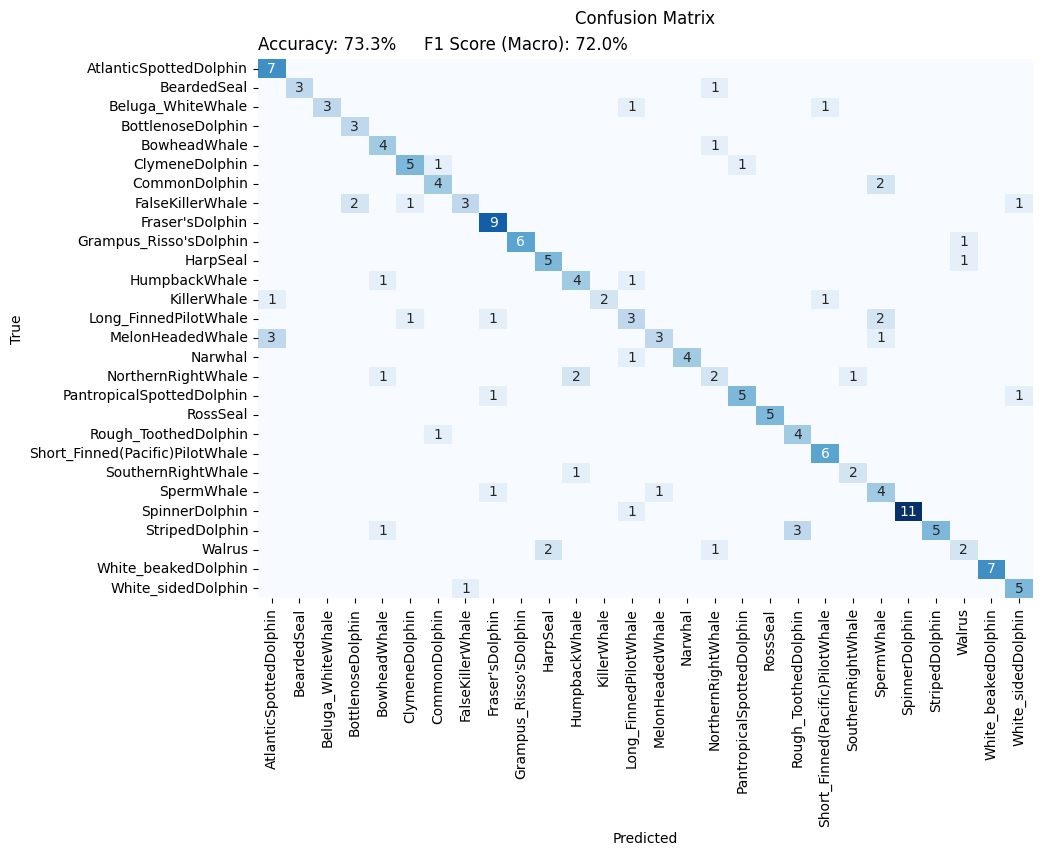

In [ ]:
accuracy, f1_macro = calculate_acc_and_f1_from_cm(cm)
display_confusion_matrix(cm, test_classes, accuracy, f1_macro)

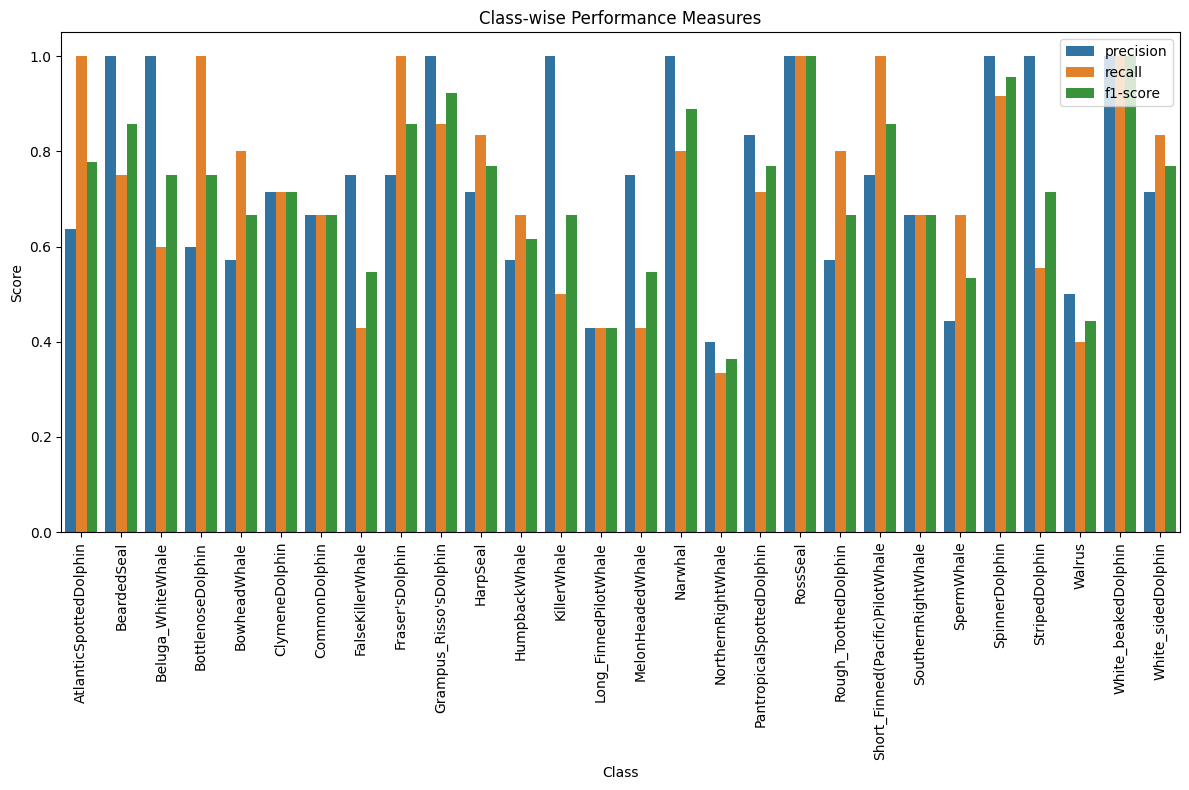

In [ ]:
display_prec_rec_f1(cm, test_classes)